### Welcome!

This is also a notebook to let you play around with the extraction method described in our ICML 2018 paper, [Extracting Automata from Recurrent Neural Networks Using Queries and Counterexamples](https://arxiv.org/abs/1711.09576), only without documentation.

In [1]:
from LSTM import LSTMNetwork
from GRU import GRUNetwork
from RNNClassifier import RNNClassifier
from Training_Functions import mixed_curriculum_train
from Tomita_Grammars import tomita_1, tomita_2, tomita_3, tomita_4, tomita_5, tomita_6, tomita_7
from Training_Functions import make_train_set_for_target
from Extraction import extract

In [2]:
target = tomita_3
alphabet = "01"

# alternative option (example):
# def target(w):
#     if len(w)==0:
#         return True
#     return w[0]==w[-1]
# alphabet = "abc"

train_set = make_train_set_for_target(target,alphabet)
rnn = RNNClassifier(alphabet,num_layers=1,hidden_dim=10,RNNClass = LSTMNetwork)

made train set of size: 2753 , of which positive examples: 1324


current average loss is:  0.00303627456805213


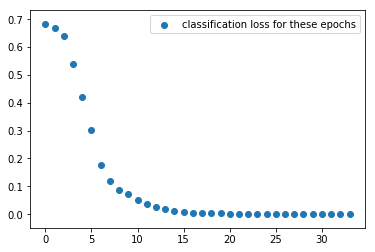

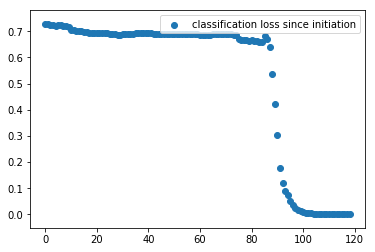

classification loss on last batch was: 0.0004724000111183851


In [3]:
mixed_curriculum_train(rnn,train_set,stop_threshold = 0.0005)

In [4]:
all_words = sorted(list(train_set.keys()),key=lambda x:len(x))
pos = next((w for w in all_words if rnn.classify_word(w)==True),None)
neg = next((w for w in all_words if rnn.classify_word(w)==False),None)
starting_examples = [w for w in [pos,neg] if not None == w]

In [5]:
rnn.renew()  
# you only really need this if you start messing about and doing weird stuff. 
# It cleans the computation graph, but doesn't reset the weights so don't worry

provided counterexamples are: ['', '10']
obs table refinement took 0.0
guided starting equivalence query for DFA of size 1


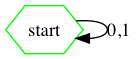

storing provided counterexample of length 2
returning counterexample of length 2:		10, this counterexample is rejected by the given RNN.
equivalence checking took: 0.015492999999992207
obs table refinement took 0.003
guided starting equivalence query for DFA of size 4


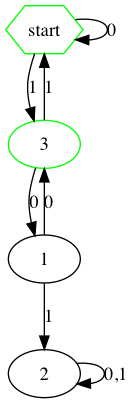

split wasn't perfect: gotta start over
returning counterexample of length 5:		10010, this counterexample is rejected by the given RNN.
equivalence checking took: 0.1335600000000028
obs table refinement took 0.007
guided starting equivalence query for DFA of size 5


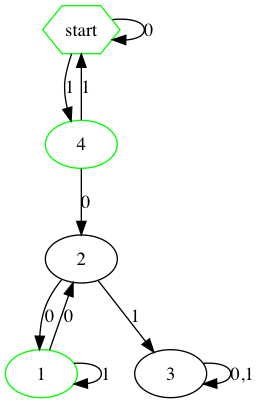

lstar successful: unrolling seems equivalent to proposed automaton
equivalence checking took: 0.02303599999999051
overall guided extraction time took: 0.18628899999998794
generated counterexamples were: (format: (counterexample, counterexample generation time))
('10', 0.015492999999992207)
('10010', 0.1335600000000028)


In [6]:
dfa = extract(rnn,time_limit = 50,initial_split_depth = 10,starting_examples=starting_examples)

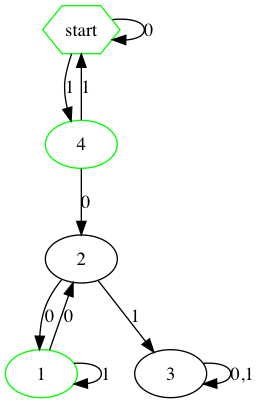

testing on train set, i.e. test set is train set
test set size: 2753
of which positive: 1324 (48.09%)
rnn score against target on test set: 2753 (100.0%)
extracted dfa score against rnn on test set: 2753 (100.0%)
extracted dfa score against target on rnn's test set: 2753 (100.0%)


In [7]:
from math import pow
def percent(num,digits=2):
    tens = pow(10,digits)
    return str(int(100*num*tens)/tens)+"%"

dfa.draw_nicely(maximum=30) #max size willing to draw

test_set = train_set 
print("testing on train set, i.e. test set is train set")
# we're printing stats on the train set for now, but you can define other test sets by using
# make_train_set_for_target again

n = len(test_set)
print("test set size:", n)
pos = len([w for w in test_set if target(w)])
print("of which positive:",pos,"("+percent(pos/n)+")")
rnn_target = len([w for w in test_set if rnn.classify_word(w)==target(w)])
print("rnn score against target on test set:",rnn_target,"("+percent(rnn_target/n)+")")
dfa_rnn = len([w for w in test_set if rnn.classify_word(w)==dfa.classify_word(w)])
print("extracted dfa score against rnn on test set:",dfa_rnn,"("+percent(dfa_rnn/n)+")")
dfa_target = len([w for w in test_set if dfa.classify_word(w)==target(w)])
print("extracted dfa score against target on rnn's test set:",dfa_target,"("+percent(dfa_target/n)+")")